### This notebook provide the instructions on how to read the Nex GDDP CMIP6 from a server using OpenVisus framework.


### **Step 1: Importing the libraries**

In [1]:
import numpy as np
import OpenVisus as ov
from datetime import datetime
import matplotlib.pyplot as plt
import os
os.environ["VISUS_CACHE"]="./visus_can_be_deleted"

### The section below shows different CMIP6 models we have available in cloud. Total dataset size is around 38TB.

In [2]:
dataset_url="http://atlantis.sci.utah.edu/mod_visus?dataset=nex-gddp-cmip6&cached=arco"

### Set Variables

In [3]:
# Set climate variables
model     = "ACCESS-CM2"
variable  = "hurs" 
scenario  = "historical"
timestamp='1950-01-01'

field = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"

In [4]:
def calculate_day_of_year(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    start_of_year = datetime(date.year, 1, 1)
    day_of_year = (date - start_of_year).days   
    return day_of_year
def get_timestep(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    day_of_year = calculate_day_of_year(date_str)
    total_days = 365 + (1 if (date.year % 4 == 0 and date.year % 100 != 0) or (date.year % 400 == 0) else 0)
    return f"{date.year*total_days+day_of_year}"

In [5]:
timestep_index=int(get_timestep(timestamp))
print(timestep_index)

711750


### **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [6]:
db=ov.LoadDataset(dataset_url)
print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}')
print(f'Total Timesteps: {len(db.getTimesteps())}')
print(f'Field: {field}')
print('Data Type: float32')

Dimensions: 1440*600
Total Timesteps: 55115
Field: hurs_day_ACCESS-CM2_historical_r1i1p1f1_gn
Data Type: float32


### **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize. 

In [7]:
data=db.read(time=timestep_index,quality=0,field=field)
data.shape

(600, 1440)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

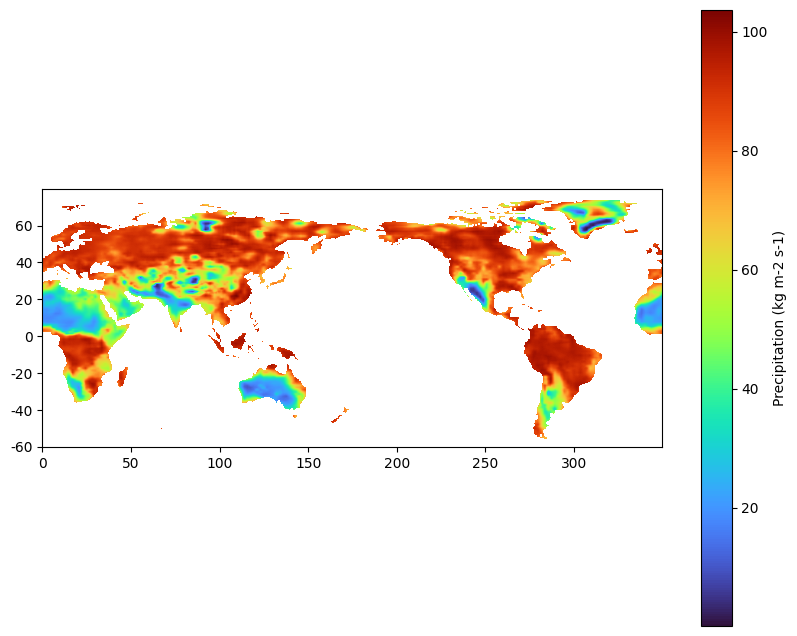

In [10]:
y_max, x_max = data.shape
xlabels = [str(x) for x in range(0, 360, 50)]
ylabels = [str(y) for y in range(-60, 90, 20)]
xticks = np.linspace(0, x_max, len(xlabels))
yticks = np.linspace(0, y_max, len(ylabels))

# Create the plot
fig, axes = plt.subplots(1, 1,figsize=(10, 8))
axes.set_xticks(xticks)
axes.set_xticklabels(xlabels)
axes.set_yticks(yticks)
axes.set_yticklabels(ylabels)

# Plot the data
im = axes.imshow(data[:, :], origin='lower', cmap='turbo')


cbar = plt.colorbar(im)
cbar.set_label('Precipitation (kg m-2 s-1)')

# Show the plot
plt.show()


For more information, please check out quarto documentation here: https://aashishp.quarto.pub/nex-gddp-cmip6/ 

### *Please reach out to Aashish Panta or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)